In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from sqlalchemy import create_engine
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [55]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

group B
math: 63.45263157894737
reading: 67.35263157894737
writing: 65.6
group C
math: 64.46394984326018
reading: 69.10344827586206
writing: 67.82758620689656
group A
math: 61.62921348314607
reading: 64.67415730337079
writing: 62.674157303370784
group D
math: 67.36259541984732
reading: 70.03053435114504
writing: 70.14503816793894
group E
math: 73.82142857142857
reading: 73.02857142857142
writing: 71.40714285714286


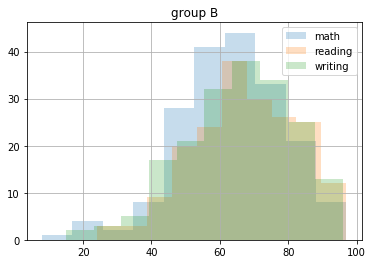

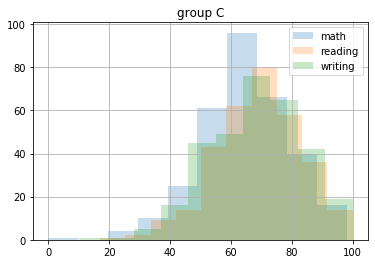

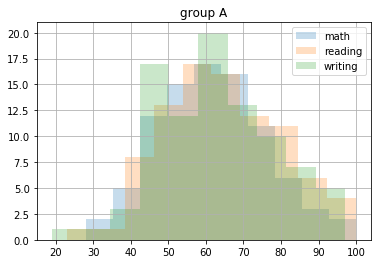

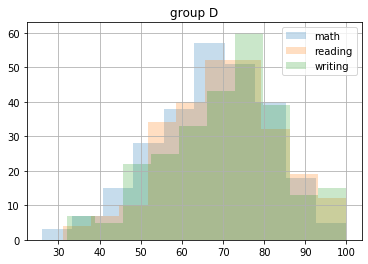

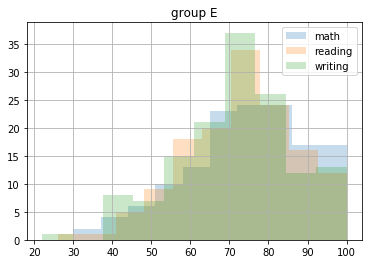

In [56]:
groups = df['race/ethnicity'].unique()
for group in groups:
    print(group)
    print('math: {}'.format(df[df['race/ethnicity'] == group]['math score'].mean()))
    print('reading: {}'.format(df[df['race/ethnicity'] == group]['reading score'].mean()))
    print('writing: {}'.format(df[df['race/ethnicity'] == group]['writing score'].mean()))
    
for group in groups:
    plt.title(group)
    df[df['race/ethnicity'] == group]['math score'].hist(alpha = .25)
    df[df['race/ethnicity'] == group]['reading score'].hist(alpha = .25)
    df[df['race/ethnicity'] == group]['writing score'].hist(alpha = .25)
    plt.legend(labels = ('math', 'reading', 'writing'))
    plt.show()

bachelor's degree
math: 69.38983050847457
reading: 73.0
writing: 73.38135593220339


some college
math: 67.1283185840708
reading: 69.46017699115045
writing: 68.84070796460178


master's degree
math: 69.7457627118644
reading: 75.37288135593221
writing: 75.67796610169492


associate's degree
math: 67.88288288288288
reading: 70.92792792792793
writing: 69.8963963963964


high school
math: 62.13775510204081
reading: 64.70408163265306
writing: 62.44897959183673


some high school
math: 63.497206703910614
reading: 66.93854748603351
writing: 64.88826815642459




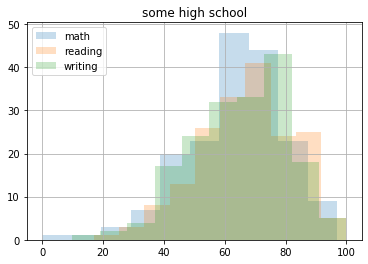

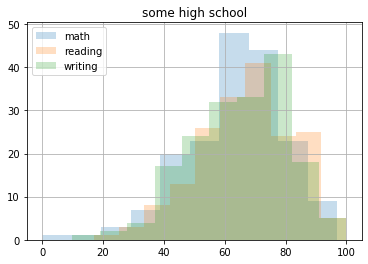

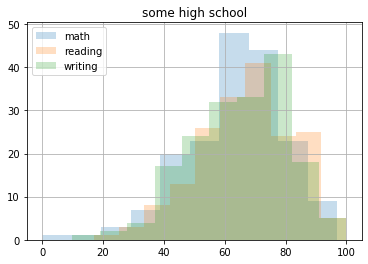

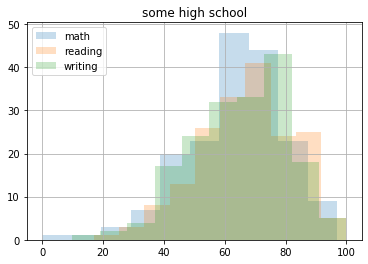

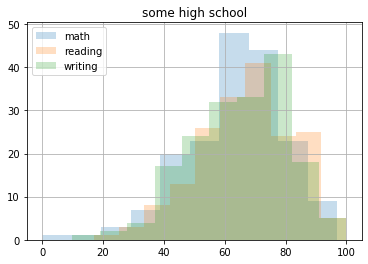

In [57]:
parents = df['parental level of education'].unique()
for parent in parents:
    print(parent)
    print('math: {}'.format(df[df['parental level of education'] == parent]['math score'].mean()))
    print('reading: {}'.format(df[df['parental level of education'] == parent]['reading score'].mean()))
    print('writing: {}'.format(df[df['parental level of education'] == parent]['writing score'].mean()))
    print('\n')
    
for group in groups:
    plt.title(parent)
    df[df['parental level of education'] == parent]['math score'].hist(alpha = .25)
    df[df['parental level of education'] == parent]['reading score'].hist(alpha = .25)
    df[df['parental level of education'] == parent]['writing score'].hist(alpha = .25)
    plt.legend(labels = ('math', 'reading', 'writing'))
    plt.show()

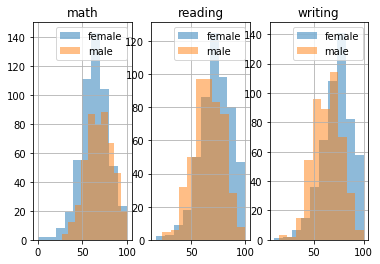

In [58]:
plt.subplot(1, 3, 1)
df.groupby('gender')['math score'].hist(alpha = .5)
plt.legend(labels = ('female', 'male'))
plt.title('math')
plt.subplot(1, 3, 2)
df.groupby('gender')['reading score'].hist(alpha = .5)
plt.title('reading')
plt.legend(labels = ('female', 'male'))
plt.subplot(1, 3, 3)
df.groupby('gender')['writing score'].hist(alpha = .5)
plt.title('writing')
plt.legend(labels = ('female', 'male'))
plt.show()

Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

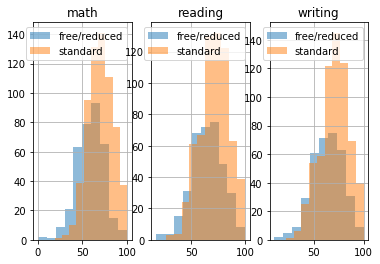

In [59]:
plt.subplot(1, 3, 1)
df.groupby('lunch')['math score'].hist(alpha = .5)
plt.legend(labels = ('free/reduced', 'standard'))
plt.title('math')
plt.subplot(1, 3, 2)
df.groupby('lunch')['reading score'].hist(alpha = .5)
plt.title('reading')
plt.legend(labels = ('free/reduced', 'standard'))
plt.subplot(1, 3, 3)
df.groupby('lunch')['writing score'].hist(alpha = .5)
plt.title('writing')
plt.legend(labels = ('free/reduced', 'standard'))
plt.show()

Likely due to parental income, a strong factor in the child's success in school.

Does the test preparation course seem to have an effect on the exam performances?
Which 2 exam scores are most correlated with each other?

Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)


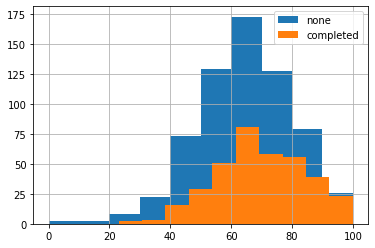

In [60]:
df[df['test preparation course'] == 'none']['math score'].hist()
df[df['test preparation course'] == 'completed']['math score'].hist()
plt.legend(labels = ('none', 'completed'))
print(stats.ttest_ind(df[df['test preparation course'] == 'none']['math score'], df[df['test preparation course'] == 'completed']['math score']))

Seems as if it had a positive effect.

In [61]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing, unsurprisingly